# Part 1: Binary Classification (Friday dataset) [Data testing] 

## 1.1 EDA 

In [11]:
import pandas as pd

df_bin=pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print(df_bin.head())

                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1   

In [2]:
df_bin.shape

(225745, 85)

In [3]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

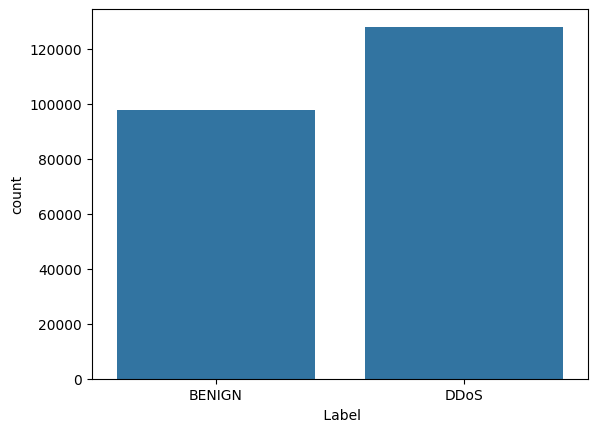

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=' Label', data=df_bin)
plt.show()

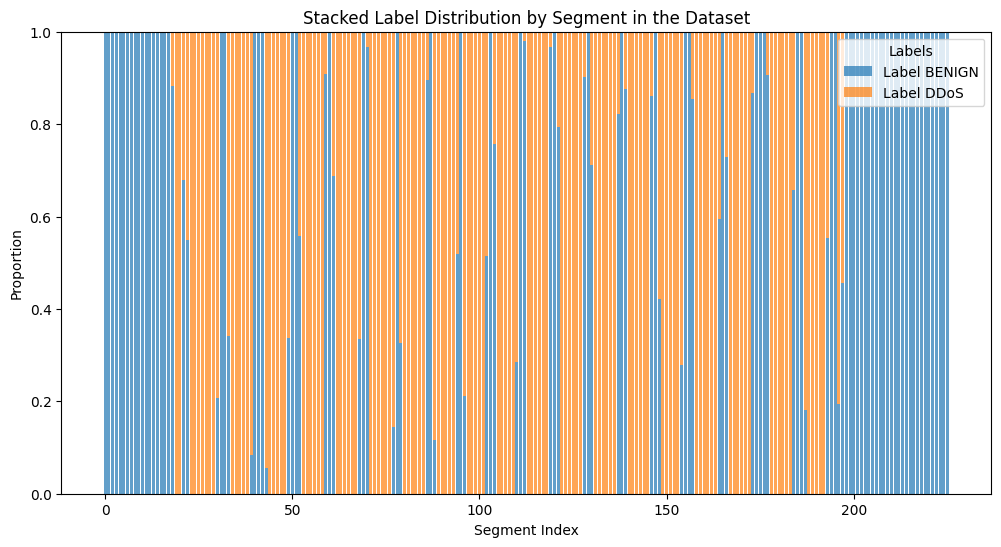

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the size of each segment
segment_size = 1000

# Calculate the total number of segments
num_segments = len(df_bin) // segment_size

# Create an empty DataFrame to store label distribution for each segment
label_distribution = pd.DataFrame()

# Calculate the label proportion for each segment
for i in range(num_segments):
    segment = df_bin[' Label'][i * segment_size: (i + 1) * segment_size]
    segment_counts = segment.value_counts(normalize=True)  # Calculate proportion
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Handle remaining data by adding an extra segment if necessary
if len(df_bin) % segment_size != 0:
    segment = df_bin[' Label'][num_segments * segment_size:]
    segment_counts = segment.value_counts(normalize=True)
    segment_counts = segment_counts.to_frame().T  # Transpose for concatenation
    label_distribution = pd.concat([label_distribution, segment_counts], ignore_index=True)

# Fill NaN values with 0 to indicate that the label is absent in that segment
label_distribution = label_distribution.fillna(0)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None  # Initial value for bottom parameter in stacked bar
for label in label_distribution.columns:
    plt.bar(label_distribution.index, label_distribution[label], label=f'Label {label}', bottom=bottom, alpha=0.7)
    bottom = (bottom + label_distribution[label]) if bottom is not None else label_distribution[label]

plt.xlabel('Segment Index')
plt.ylabel('Proportion')
plt.title('Stacked Label Distribution by Segment in the Dataset')
plt.legend(title='Labels')
plt.show()

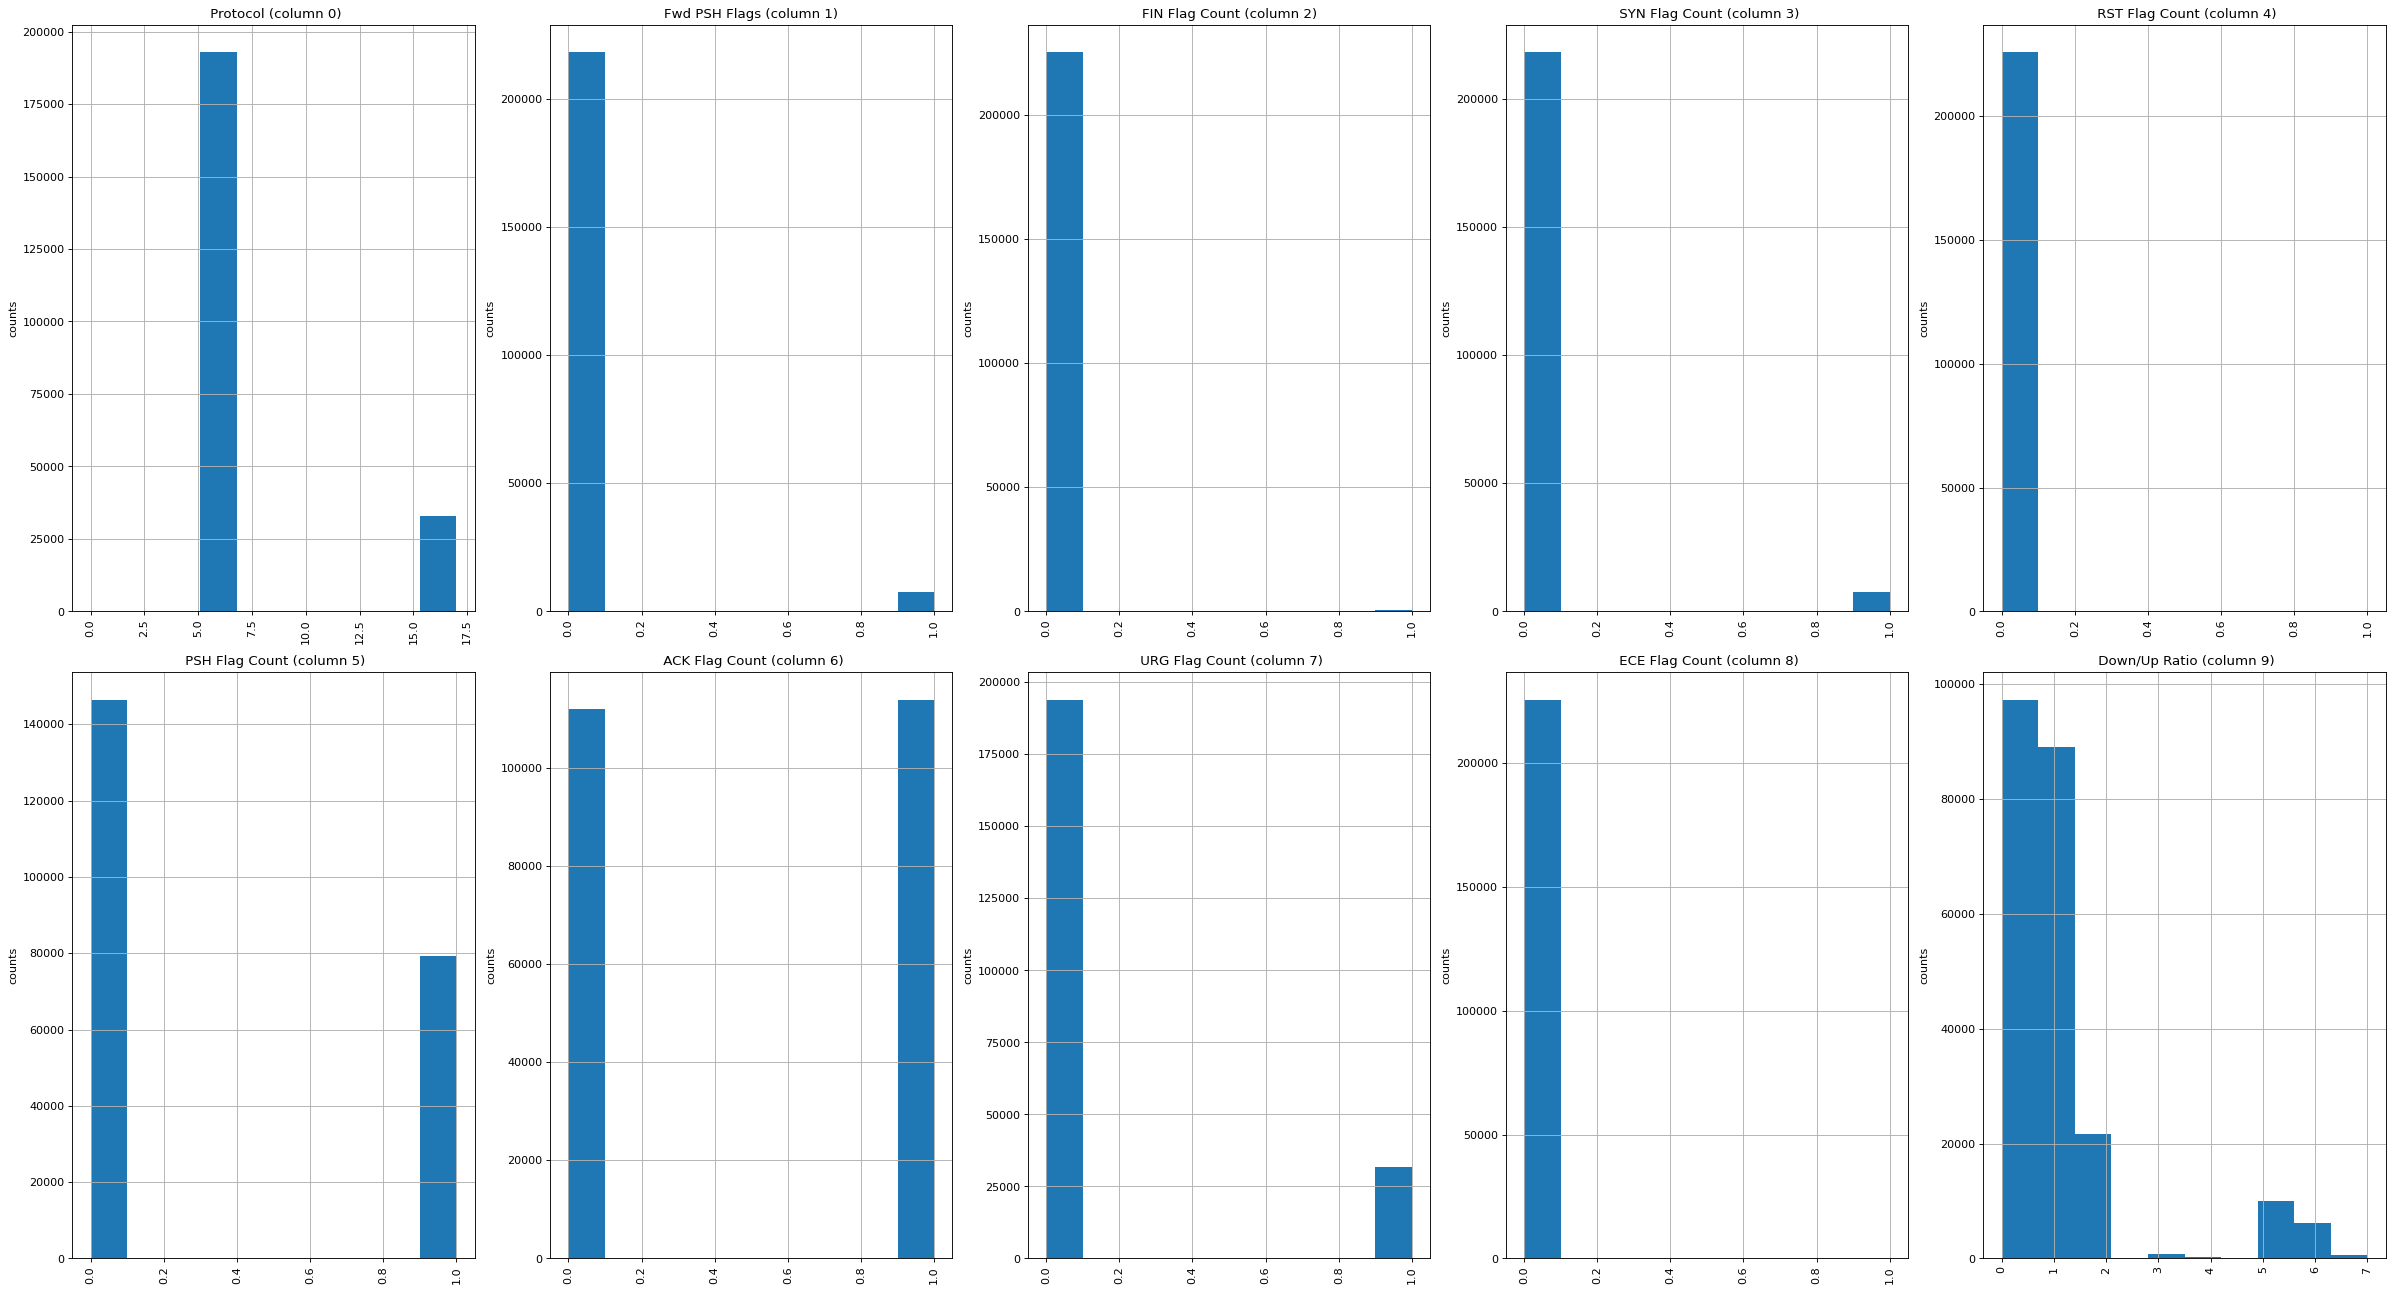

In [22]:
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    # Set up the figure size dynamically based on the number of graphs
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        # Check column data type directly
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# TODO Adjust parameters
plotPerColumnDistribution(df_bin, 10, 5)

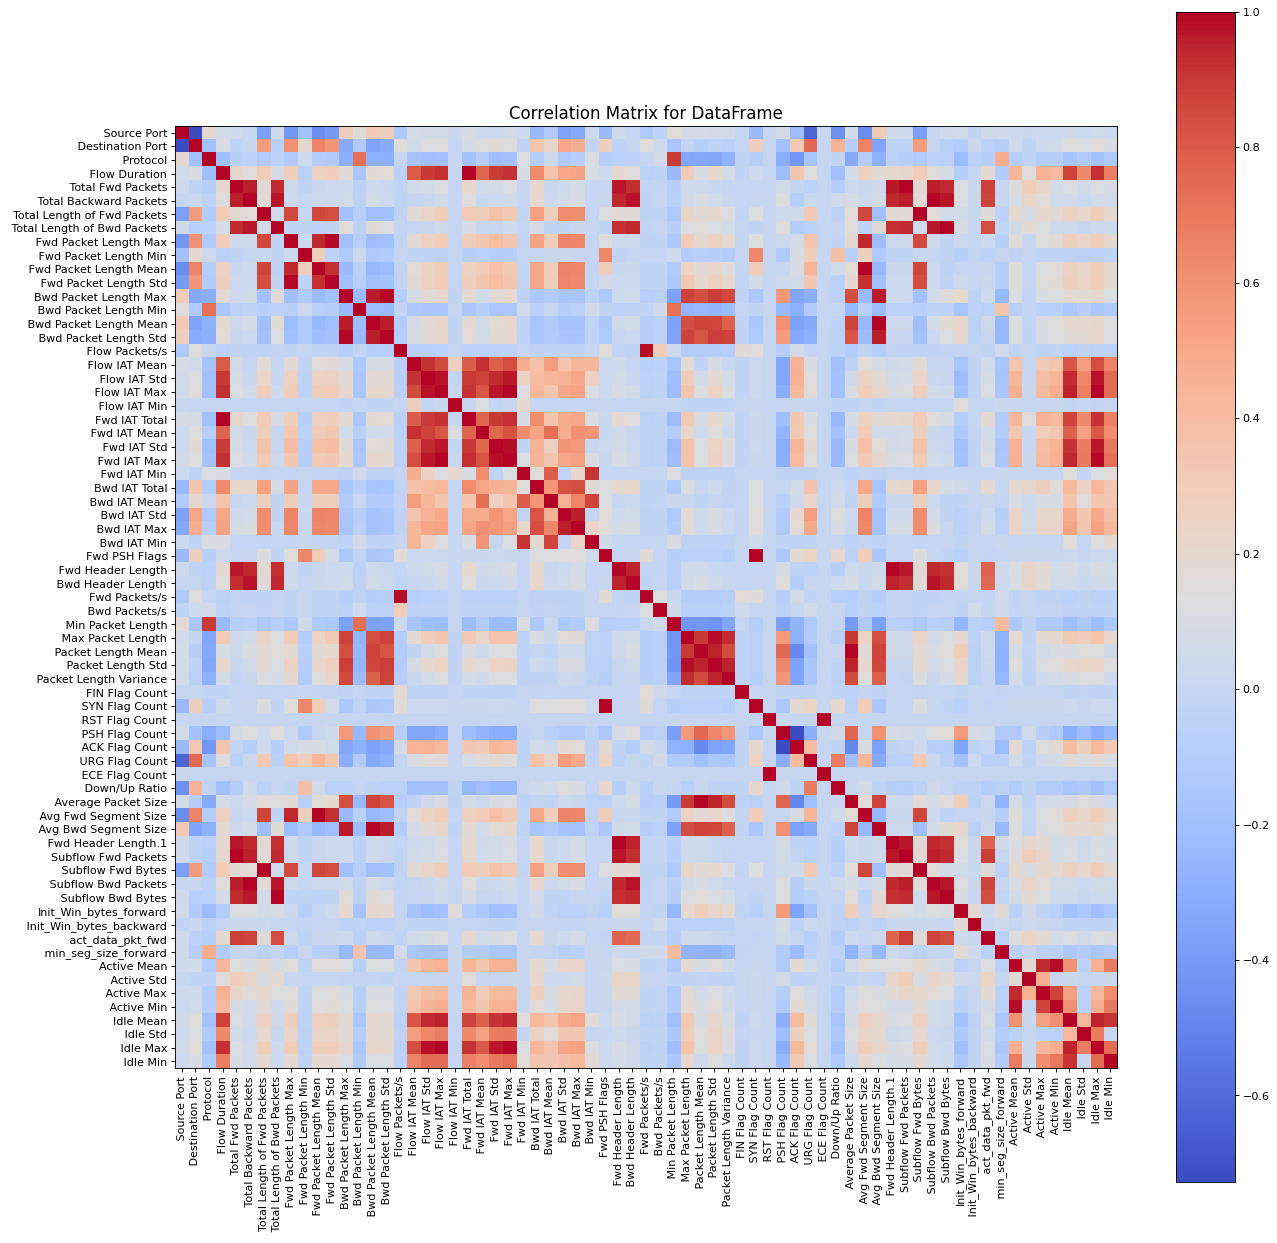

In [25]:
import matplotlib.pyplot as plt

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Check if df has 'dataframeName' attribute, otherwise set a default name
    filename = getattr(df, 'dataframeName', 'DataFrame')

    # TODO Whether drop these in this step
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    # Keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    
    # Check if there are at least 2 columns for correlation
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    # Calculate correlation matrix
    corr = df.corr()
    
    # Set up plot size
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    
    # Plot the correlation matrix
    corrMat = plt.matshow(corr, cmap='coolwarm', fignum=0)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    
    # Add color bar and title
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Drop columns with non-numeric data before calculating correlation
df_numeric = df_bin.select_dtypes(include=[np.number])

plotCorrelationMatrix(df_numeric, 19)

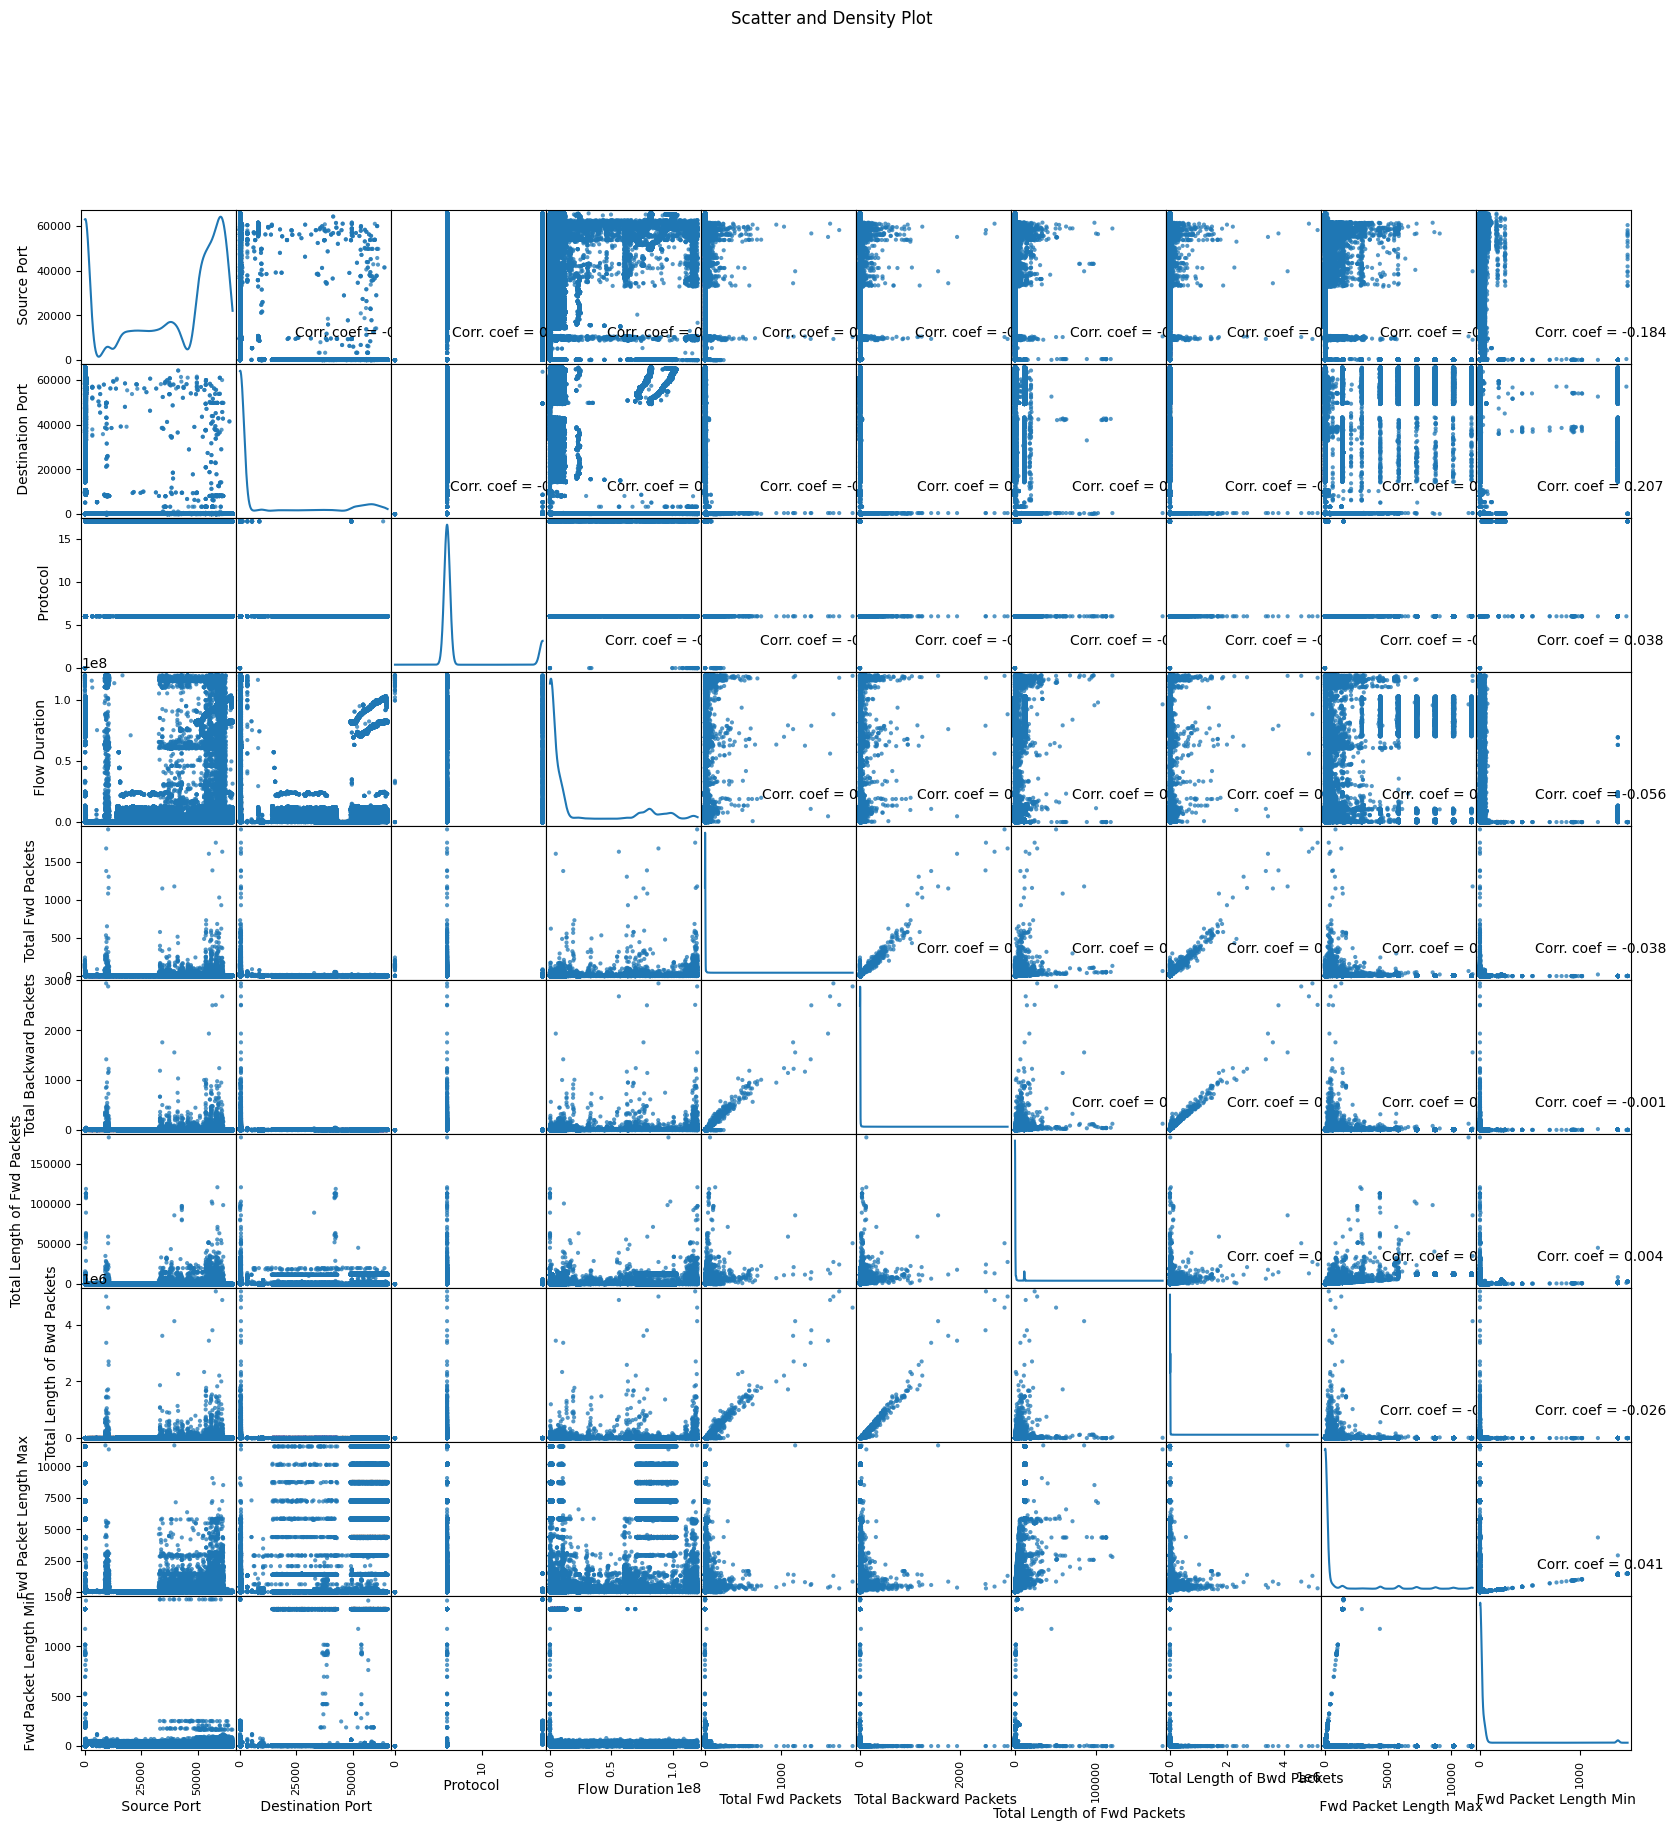

In [28]:
# Scatter and density plots
# TODO Not knowing the meaning
def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns with more than 1 unique value
    
    # Limit the number of columns to avoid singularity in density plots
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    
    # Plot scatter matrix
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    # Calculate correlation coefficients and annotate
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', 
                          (0.8, 0.2), xycoords='axes fraction', 
                          ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df_bin, 20, 10)

## 1.2 Data understanding/ pre-processing Q: Sampling

In [2]:
import numpy as np

# TODO How to handle NaN and inf
# Replace Inf values with NaN
df_bin.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows that contain NaN values (including those originally NaN and replaced Inf values)
df_bin.dropna(inplace=True)
# Check the shape to verify the number of rows and columns after dropping
df_bin.shape

(225711, 85)

In [3]:
# Map labels to numbers without using replace, then cast to integer
df_bin[' Label'] = df_bin[' Label'].map({'BENIGN': 0, 'DDoS': 1}).astype(int)

# Check the first few values to confirm
df_bin[' Label'].head()

0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int64

In [4]:
import numpy as np

# Filter df_bin to keep only numeric columns, which removes IPs and timestamp
numeric_cols = df_bin.select_dtypes(include=['int64', 'float64']).columns
df_bin = df_bin[numeric_cols]
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225711 entries, 0 to 225744
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source Port                  225711 non-null  int64  
 1    Destination Port             225711 non-null  int64  
 2    Protocol                     225711 non-null  int64  
 3    Flow Duration                225711 non-null  int64  
 4    Total Fwd Packets            225711 non-null  int64  
 5    Total Backward Packets       225711 non-null  int64  
 6   Total Length of Fwd Packets   225711 non-null  int64  
 7    Total Length of Bwd Packets  225711 non-null  int64  
 8    Fwd Packet Length Max        225711 non-null  int64  
 9    Fwd Packet Length Min        225711 non-null  int64  
 10   Fwd Packet Length Mean       225711 non-null  float64
 11   Fwd Packet Length Std        225711 non-null  float64
 12  Bwd Packet Length Max         225711 non-null  in

In [5]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold to remove features with zero variance
constant_filter = VarianceThreshold(threshold=0)  # threshold=0 removes constant features

# Fit the filter and transform the dataset
df_bin_filtered = constant_filter.fit_transform(df_bin)

# Get the original column names for features that were kept
kept_cols = df_bin.columns[constant_filter.get_support(indices=True)]
# Get the original column names for features that were removed
removed_cols = df_bin.columns.difference(kept_cols)

# Convert the filtered numpy array back to a DataFrame with retained column names
df_bin = pd.DataFrame(df_bin_filtered, columns=kept_cols)

# Print the names of columns that were removed (constant features)
print("Constant columns removed:", removed_cols.tolist())

Constant columns removed: [' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', ' Bwd PSH Flags', ' Bwd URG Flags', ' CWE Flag Count', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', ' Fwd URG Flags', 'Bwd Avg Bulk Rate', 'Fwd Avg Bytes/Bulk']


## 1.3 Train Test Validattion Randomly 

In [6]:
from sklearn.model_selection import train_test_split

# Define the sizes for each set
train_size = 0.7
test_size = 0.15
val_size = 0.15

# First, split df_bin into training and temp (combined validation and test)
df_train, df_temp = train_test_split(df_bin, test_size=(1 - train_size), random_state=42)

# Then, split df_temp into validation and test sets
df_test, df_val = train_test_split(df_temp, test_size=(val_size / (test_size + val_size)), random_state=42)

# TODO Remove
df_test= df_temp

# Print the shape of each dataset
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)
print("Validation set shape:", df_val.shape)

Train set shape: (157997, 71)
Test set shape: (67714, 71)
Validation set shape: (33857, 71)


In [8]:
# Drop the label column to create feature and target datasets
X_df_train = df_train.drop(' Label', axis=1)
Y_df_train = df_train[' Label']
X_df_test = df_test.drop(' Label', axis=1)
Y_df_test = df_test[' Label']
X_df_val = df_val.drop(' Label', axis=1)
Y_df_val = df_val[' Label']

In [9]:
from sklearn import preprocessing
import pandas as pd

# Save original column names before transforming
original_cols = X_df_train.columns

# Standardize the training data
scaler = preprocessing.StandardScaler().fit(X_df_train)
X_df_train = pd.DataFrame(scaler.transform(X_df_train), columns=original_cols)

# Use the same scaler to transform the test and validation data
X_df_test = pd.DataFrame(scaler.transform(X_df_test), columns=original_cols)
X_df_val = pd.DataFrame(scaler.transform(X_df_val), columns=original_cols)

## 1.4 Feature engineering 

### Feature Selection Manually

In [18]:
# TODO Why remove these columns
remove_cols = ['Flow Bytes/s', ' Flow Packets/s', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', 'Fwd Avg Bytes/Bulk',
' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', ' ECE Flag Count', ' PSH Flag Count']

df_bin.drop(remove_cols, axis=1, inplace = True, errors="ignore")

### Feature Selection with ANOVA F-test SelectPercentile

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Suppress divide by zero and invalid warnings
np.seterr(divide='ignore', invalid='ignore')

# Apply feature selection to keep the top 10 features
selector = SelectKBest(f_classif, k=10)
X_df_train_anova = selector.fit_transform(X_df_train, Y_df_train)
# Transform the test dataset with the same selector
X_df_test_anova = selector.transform(X_df_test)
# Transform the test dataset with the same selector
X_df_val_anova = selector.transform(X_df_val)

# Get selected column names
selected_cols = original_cols[selector.get_support(indices=True)]
# Get filtered-out column names
filtered_cols = original_cols[~selector.get_support()]

# Print selected columns and filtered columns
print("Selected columns (top 10 features):", selected_cols.tolist())
print("Filtered-out columns:", filtered_cols.tolist())

Selected columns (top 10 features): [' Destination Port', ' Protocol', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Mean', ' Packet Length Std', ' URG Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size']
Filtered-out columns: [' Source Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Variance', 'FI

### Feature Selection with RFE and Decistion Tree

In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Rank all features and specify the number of features to select (e.g., top 10)
n_features = 10  # Change this to the desired number of features to select
rfe = RFE(clf, n_features_to_select=n_features)
rfe.fit(X_df_train, Y_df_train)

# Get the selected feature mask and names of selected and filtered-out features
selected_mask = rfe.support_  # Boolean mask of selected features
selected_cols = original_cols[selected_mask]  # Names of selected features

# Create a DataFrame with only the selected features
X_df_train_rfe = pd.DataFrame(rfe.transform(X_df_train), columns=selected_cols)
X_df_test_rfe = pd.DataFrame(rfe.transform(X_df_test), columns=selected_cols)
X_df_val_rfe = pd.DataFrame(rfe.transform(X_df_val), columns=selected_cols)

# Print DDoS features sorted by their rank without data types
print("DDoS Features sorted by their rank:")
ranked_features = sorted(zip(rfe.ranking_, original_cols))
for rank, feature in ranked_features:
    print(f"Rank {rank}: {feature}")

DDoS Features sorted by their rank:
Rank 1:  Average Packet Size
Rank 1:  Avg Bwd Segment Size
Rank 1:  Bwd Header Length
Rank 1:  Destination Port
Rank 1:  Fwd IAT Std
Rank 1:  Fwd Packet Length Max
Rank 1:  Init_Win_bytes_backward
Rank 1:  Source Port
Rank 1:  Subflow Fwd Bytes
Rank 1: Init_Win_bytes_forward
Rank 2:  Flow IAT Min
Rank 3:  Bwd Packets/s
Rank 4:  Packet Length Std
Rank 5:  Active Min
Rank 6:  Active Max
Rank 7:  act_data_pkt_fwd
Rank 8:  Packet Length Variance
Rank 9:  Active Std
Rank 10: Active Mean
Rank 11:  min_seg_size_forward
Rank 12:  SYN Flag Count
Rank 13: FIN Flag Count
Rank 14: Subflow Fwd Packets
Rank 15:  Fwd Header Length.1
Rank 16:  Avg Fwd Segment Size
Rank 17:  Down/Up Ratio
Rank 18:  ECE Flag Count
Rank 19:  URG Flag Count
Rank 20:  ACK Flag Count
Rank 21:  Packet Length Mean
Rank 22:  PSH Flag Count
Rank 23:  RST Flag Count
Rank 24:  Max Packet Length
Rank 25:  Min Packet Length
Rank 26: Fwd Packets/s
Rank 27:  Bwd IAT Mean
Rank 28:  Fwd Header Length

### Feature Selection with Correlation Matrix Q:Maybe do this at first

Filtered-out Features (due to high correlation): [' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']
Selected Features after Correlation-based Filtering: Index([' Source Port', ' Destination Port', ' 

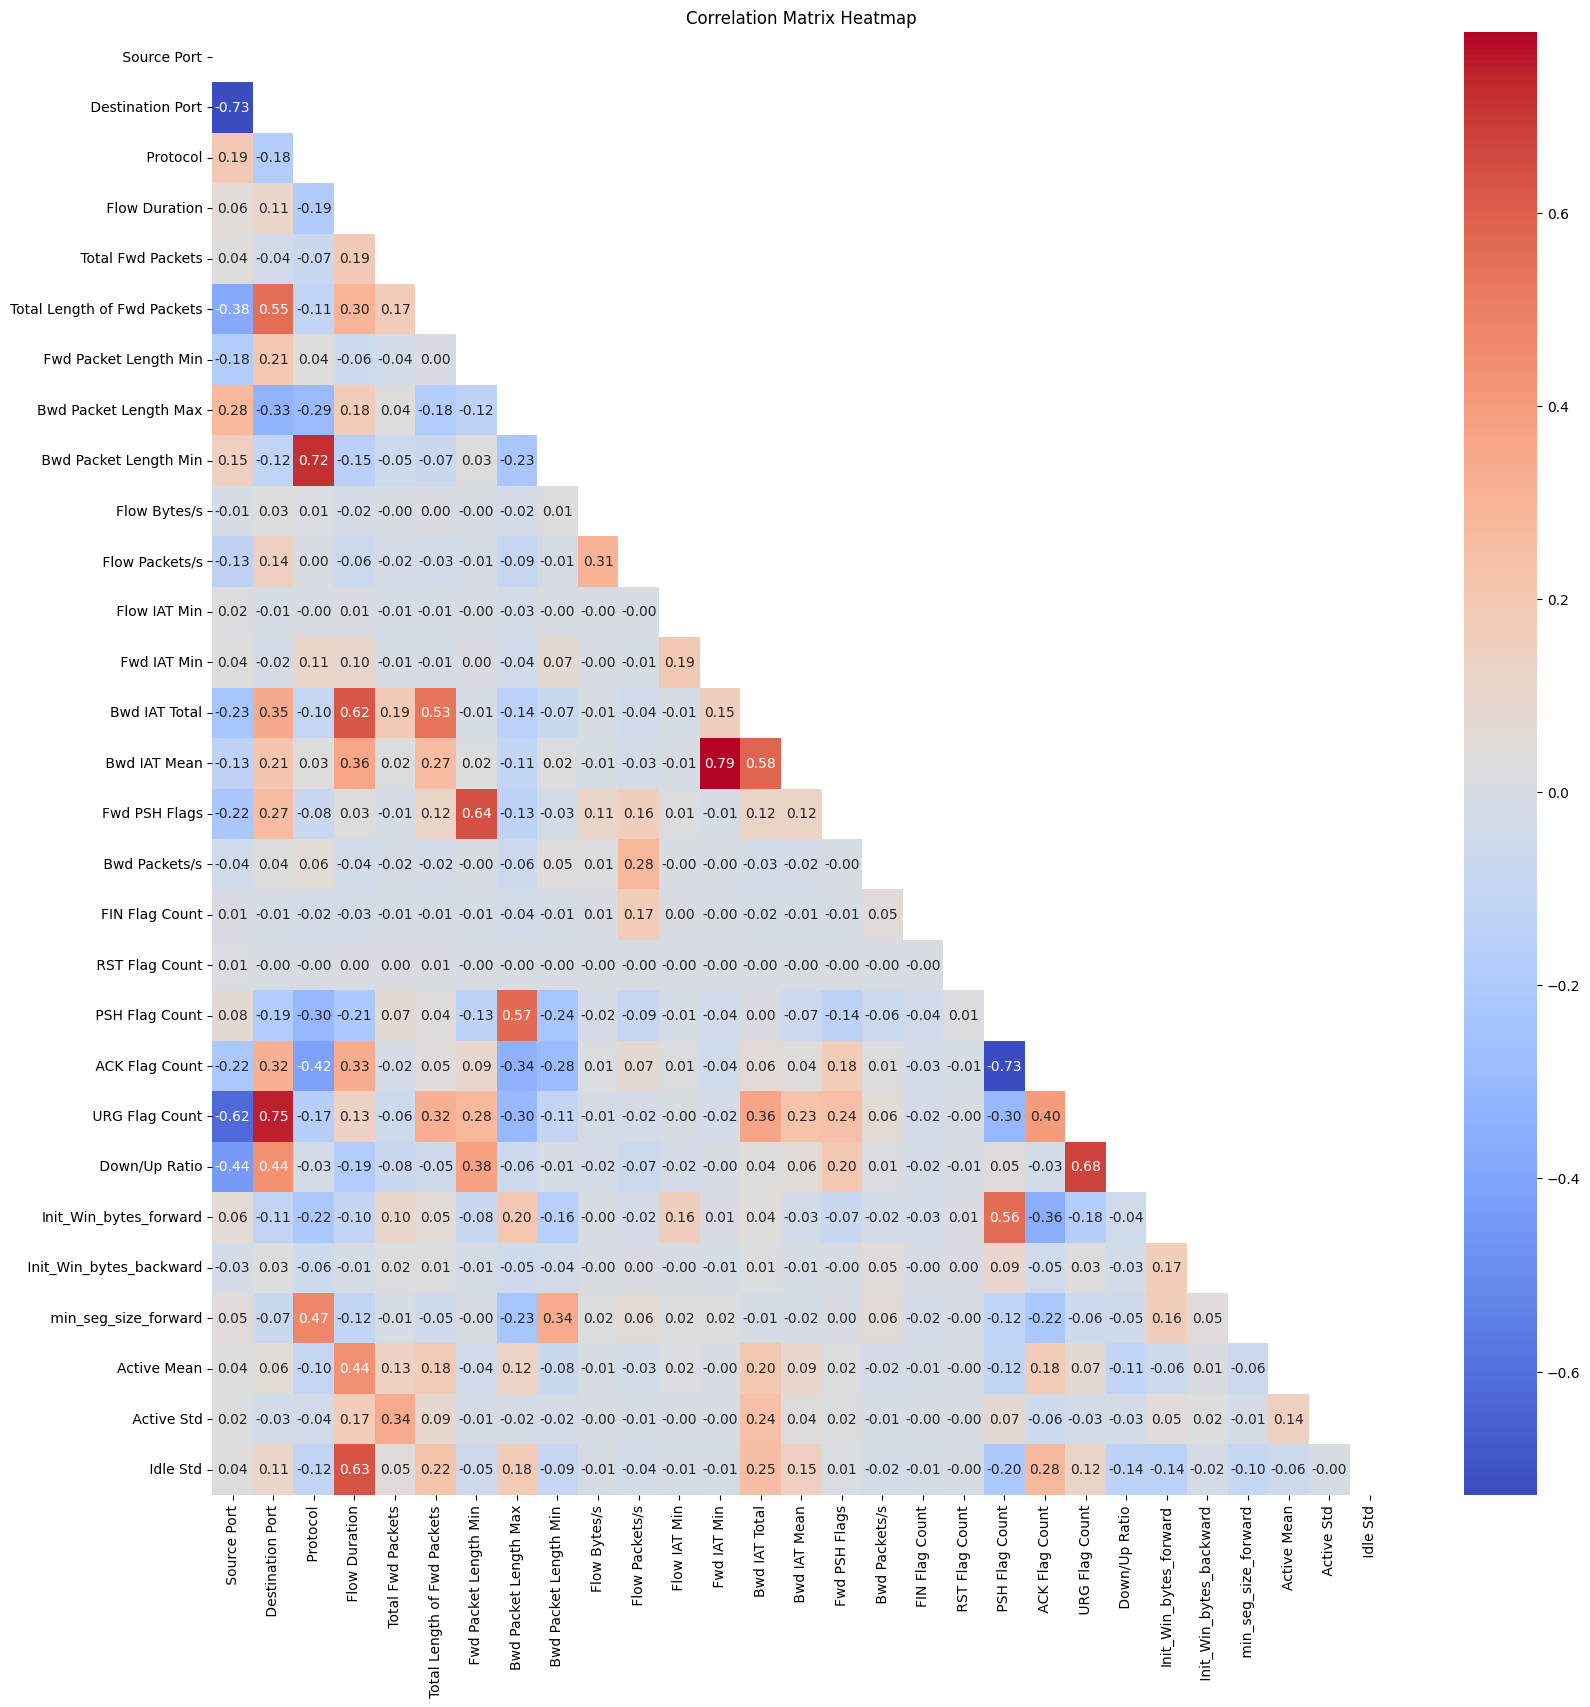

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the absolute correlation matrix of the training set
corr_matrix = X_df_train.corr().abs()

# Generate a boolean mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1) == 1

# Select only the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(mask)

# Identify columns with a high correlation (greater than 0.8) and add them to a list to be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Print the names and data types of features filtered out due to high correlation
print("Filtered-out Features (due to high correlation):", to_drop)

# Drop highly correlated features from training, test, and validation sets
X_df_train_corr_filtered = X_df_train.drop(columns=to_drop)
X_df_test_corr_filtered = X_df_test.drop(columns=to_drop)
X_df_val_corr_filtered = X_df_val.drop(columns=to_drop)

# Print the names and data types of the selected features after filtering
print("Selected Features after Correlation-based Filtering:", X_df_train_corr_filtered.columns)

# Define a function to plot the correlation heatmap
def plot_heatmap(df, size=(10, 8)):
    plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(np.ones(df.corr().shape, dtype=bool)))
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Calculate the number of numeric columns and set heatmap size based on it
n_numeric_cols = len(X_df_train_corr_filtered.select_dtypes(include=[np.number]).columns) // 3 * 2
plot_heatmap(X_df_train_corr_filtered, size=(n_numeric_cols+1, n_numeric_cols+1))

## 1.5 Modeling 

### 1.5.1 Structured Approach

#### Decision Tree

- all features (Seems no need to remove features)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

accuracy = cross_val_score(clf_DDoS, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Y_df_val_pred=clf_DDoS.predict(X_df_val)
# Create confusion matrix
pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Accuracy: 0.99976 (+/- 0.00044)
Precision: 0.99969 (+/- 0.00069)
Recall: 0.99990 (+/- 0.00042)
F-measure: 0.99979 (+/- 0.00039)


Predicted attacks,0.0,1.0
Actual attacks,,
0.0,14632,1
1.0,0,19224


- Anova 10 features

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf_DDoS_anova=DecisionTreeClassifier(random_state=0)
clf_DDoS_anova.fit(X_df_train_anova, Y_df_train)

accuracy = cross_val_score(clf_DDoS_anova, X_df_val_anova, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS_anova, X_df_val_anova, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS_anova, X_df_val_anova, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS_anova, X_df_val_anova, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Y_df_val_anova_pred=clf_DDoS_anova.predict(X_df_val_anova)
# Create confusion matrix
pd.crosstab(Y_df_val, Y_df_val_anova_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Accuracy: 0.99944 (+/- 0.00072)
Precision: 0.99964 (+/- 0.00094)
Recall: 0.99938 (+/- 0.00078)
F-measure: 0.99951 (+/- 0.00063)


Predicted attacks,0.0,1.0
Actual attacks,,
0.0,14631,2
1.0,10,19214


- RFE 10 features

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf_DDoS_rfe=DecisionTreeClassifier(random_state=0)
clf_DDoS_rfe.fit(X_df_train_rfe, Y_df_train)

accuracy = cross_val_score(clf_DDoS_rfe, X_df_val_rfe, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS_rfe, X_df_val_rfe, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS_rfe, X_df_val_rfe, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS_rfe, X_df_val_rfe, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Y_df_val_rfe_pred=clf_DDoS_rfe.predict(X_df_val_rfe)
# Create confusion matrix
pd.crosstab(Y_df_val, Y_df_val_rfe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Accuracy: 0.99959 (+/- 0.00076)
Precision: 0.99953 (+/- 0.00108)
Recall: 0.99974 (+/- 0.00070)
F-measure: 0.99964 (+/- 0.00067)


Predicted attacks,0.0,1.0
Actual attacks,,
0.0,14631,2
1.0,2,19222


#### Random Forest

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize RandomForestClassifier with hyperparameters
clf_DDoS_rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=20,            # Maximum depth of each tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=0
)

# Train the model
clf_DDoS_rf.fit(X_df_train, Y_df_train)

# Perform cross-validation and calculate metrics
accuracy = cross_val_score(clf_DDoS_rf, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS_rf, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS_rf, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f_measure = cross_val_score(clf_DDoS_rf, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure.mean(), f_measure.std() * 2))

# Predict on validation data
Y_df_val_pred = clf_DDoS_rf.predict(X_df_val)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)

from joblib import dump

# Save the trained model to a file
dump(clf_DDoS_rf, 'ddos_model.pkl')

print("Model saved as ddos_model.pkl")

Accuracy: 0.99976 (+/- 0.00058)
Precision: 1.00000 (+/- 0.00000)
Recall: 0.99958 (+/- 0.00102)
F-measure: 0.99979 (+/- 0.00051)
Predicted attacks    0.0    1.0
Actual attacks                 
0.0                14633      0
1.0                    0  19224
Model saved as ddos_model.pkl


#### XGBoost

In [23]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import pandas as pd

# Initialize XGBClassifier with some base parameters; can be tuned further
clf_DDoS_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
    eval_metric='logloss'  # or 'auc' for binary classification
)

# Train the model
clf_DDoS_xgb.fit(X_df_train, Y_df_train)

# Perform cross-validation and calculate metrics
accuracy = cross_val_score(clf_DDoS_xgb, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS_xgb, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS_xgb, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f_measure = cross_val_score(clf_DDoS_xgb, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure.mean(), f_measure.std() * 2))

# Predict on validation data
Y_df_val_pred = clf_DDoS_xgb.predict(X_df_val)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)

Accuracy: 0.99976 (+/- 0.00064)
Precision: 0.99990 (+/- 0.00042)
Recall: 0.99969 (+/- 0.00106)
F-measure: 0.99979 (+/- 0.00056)
Predicted attacks      0      1
Actual attacks                 
0.0                14632      1
1.0                    0  19224


#### LightGBM

In [20]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import pandas as pd

# Initialize LightGBM classifier with example hyperparameters
clf_DDoS_lgb = lgb.LGBMClassifier(
    n_estimators=100,        # Number of boosting iterations
    max_depth=10,            # Maximum tree depth for base learners
    learning_rate=0.1,       # Boosting learning rate
    num_leaves=31,           # Number of leaves in one tree
    subsample=0.8,           # Subsample ratio of the training instance
    colsample_bytree=0.8,    # Subsample ratio of columns
    random_state=42,
    verbose=-1  # Suppress intermediate output
)

# Train the model
clf_DDoS_lgb.fit(X_df_train, Y_df_train)

# Perform cross-validation and calculate metrics
accuracy = cross_val_score(clf_DDoS_lgb, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS_lgb, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS_lgb, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f_measure = cross_val_score(clf_DDoS_lgb, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure.mean(), f_measure.std() * 2))

# Predict on validation data
Y_df_val_pred = clf_DDoS_lgb.predict(X_df_val)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)

Accuracy: 0.99982 (+/- 0.00047)
Precision: 0.99990 (+/- 0.00042)
Recall: 0.99979 (+/- 0.00069)
F-measure: 0.99984 (+/- 0.00042)
Predicted attacks    0.0    1.0
Actual attacks                 
0.0                14633      0
1.0                    0  19224


#### CatBoost

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize CatBoostClassifier with basic parameters
clf_DDoS_catboost = CatBoostClassifier(
    iterations=500,       # Number of boosting iterations
    depth=6,              # Depth of the tree
    learning_rate=0.1,    # Learning rate
    l2_leaf_reg=3,        # L2 regularization coefficient
    border_count=64,      # Number of border splits for numeric features
    verbose=0,
    random_state=0
)

# Train the CatBoost model
clf_DDoS_catboost.fit(X_df_train, Y_df_train)

# Perform cross-validation and calculate metrics
accuracy = cross_val_score(clf_DDoS_catboost, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS_catboost, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS_catboost, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f_measure = cross_val_score(clf_DDoS_catboost, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure.mean(), f_measure.std() * 2))

# Predict on validation data
Y_df_val_pred = clf_DDoS_catboost.predict(X_df_val)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)

Accuracy: 0.99970 (+/- 0.00059)
Precision: 0.99990 (+/- 0.00062)
Recall: 0.99958 (+/- 0.00078)
F-measure: 0.99974 (+/- 0.00052)
Predicted attacks    0.0    1.0
Actual attacks                 
0.0                14633      0
1.0                    1  19223


#### Gradient Boosting

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Initialize GradientBoostingClassifier with example hyperparameters
clf_DDoS_gb = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages to be run
    max_depth=3,            # Maximum depth of the individual estimators
    learning_rate=0.1,      # Learning rate shrinks contribution of each tree
    subsample=1.0,          # Fraction of samples to use for fitting each base learner
    random_state=0
)

# Train the model
clf_DDoS_gb.fit(X_df_train, Y_df_train)

# Perform cross-validation and calculate metrics
accuracy = cross_val_score(clf_DDoS_gb, X_df_val, Y_df_val, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

precision = cross_val_score(clf_DDoS_gb, X_df_val, Y_df_val, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(clf_DDoS_gb, X_df_val, Y_df_val, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

f_measure = cross_val_score(clf_DDoS_gb, X_df_val, Y_df_val, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f_measure.mean(), f_measure.std() * 2))

# Predict on validation data
Y_df_val_pred = clf_DDoS_gb.predict(X_df_val)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_val, Y_df_val_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)

Accuracy: 0.99962 (+/- 0.00065)
Precision: 0.99984 (+/- 0.00067)
Recall: 0.99948 (+/- 0.00093)
F-measure: 0.99966 (+/- 0.00057)
Predicted attacks    0.0    1.0
Actual attacks                 
0.0                14632      1
1.0                    6  19218


#### K fold validation with XGBoost


In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from xgboost import XGBClassifier

# Initialize XGBClassifier with some base parameters; can be tuned further
clf_DDoS_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
    eval_metric='logloss'
)

# Perform cross-validation and calculate metrics directly on predictions
y_pred_cv = cross_val_predict(clf_DDoS_xgb, X_df_train, Y_df_train, cv=10)

# Calculate metrics based on cross-validated predictions
accuracy = accuracy_score(Y_df_train, y_pred_cv)
precision = precision_score(Y_df_train, y_pred_cv)
recall = recall_score(Y_df_train, y_pred_cv)
f1 = f1_score(Y_df_train, y_pred_cv)

print("Cross-validated Accuracy: {:.5f}".format(accuracy))
print("Cross-validated Precision: {:.5f}".format(precision))
print("Cross-validated Recall: {:.5f}".format(recall))
print("Cross-validated F-measure: {:.5f}".format(f1))

# Create confusion matrix
confusion_matrix_result = confusion_matrix(Y_df_train, y_pred_cv)

# Display confusion matrix with appropriate index and column labels
print(pd.DataFrame(confusion_matrix_result, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

Cross-validated Accuracy: 0.99993
Cross-validated Precision: 0.99996
Cross-validated Recall: 0.99992
Cross-validated F-measure: 0.99994
          Predicted 0  Predicted 1
Actual 0        68361            4
Actual 1            7        89625


### 1.5.2 Time series approach (Not considering for this case)

### 1.5.3 Unstructured Approach (Q: May not apply)

## 1.6 Model evaluation (Q:Not using k fold)